In [65]:
#Import required packages
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [66]:
DZdatacsv = pd.read_csv (r'Mowakly_Q2.csv')

In [67]:
DZdatacsv.head(5)

,text,answer
0,ما هي شروط الزواج المصري؟,شروط الزواج المصري: شهادة ميلاد وشهادة عدم مما...
1,ما هي الإجراءات للطلاق؟,الإجراءات للطلاق: تقديم طلب إلى المحكمة وإثبات...
2,ما هي مدة العدة بعد الطلاق؟,مدة العدة بعد الطلاق: 3 دورات شهرية للمرأة.
3,ما هي شروط الخلع؟,شروط الخلع: التحري عن رغبة المرأة وعدم الإيذاء...
4,ما هي حقوق الأبوين في الحضانة؟,حقوق الأبوين في الحضانة: الحفاظ على مصلحة الطف...


In [68]:
DZdatacsv.shape

(2055, 2)

In [69]:
import re
def get_all_words_with_frequency(corpus):

  input_tokens = set()
  for line in corpus:
    for token in re.findall(r"[\w']+|[^\s\w]", line):
      if token not in input_tokens:
        input_tokens.add(token)
  return len(input_tokens)

In [70]:
def MaxWordsSentence(corpus):
    maxsentence = ""
    maxwords = 0
    for sentence in corpus:
        if len(sentence.split(' ')) > maxwords:
            maxwords = len(sentence.split(' '))
            maxsentence = sentence
    return maxsentence,maxwords

In [71]:
def MaxChartsSentence(corpus):
    maxsentence = ""
    maxwords = 0
    for sentence in corpus:
        if len(sentence) > maxwords:
            maxwords = len(sentence)
            maxsentence = sentence
    return maxsentence,maxwords

In [72]:
def MinWordsSentence(corpus):
    minsentence = ""
    minwords = float('inf')
    for sentence in corpus:
        if len(sentence.split(' ')) < minwords:
            minwords = len(sentence.split(' '))
            minsentence = sentence
    return minsentence,minwords

In [73]:
def MinChartsSentence(corpus):
    minsentence = ""
    minwords = float('inf')
    for sentence in corpus:
        if len(sentence) < minwords:
            minwords = len(sentence)
            minsentence = sentence

    return minsentence,minwords

In [74]:
get_all_words_with_frequency(DZdatacsv["text"]+ DZdatacsv["answer"])

3143

In [75]:
get_all_words_with_frequency(DZdatacsv["text"])

1172

In [76]:
print('##Longest sentence (Words): Question')
print('')
longsent, maxwords = MaxWordsSentence(DZdatacsv["text"])

print(longsent)

print(maxwords)

print('')
print('##Shortest sentence (Words): Question')
print('')
shortsent, minwords = MinWordsSentence(DZdatacsv["text"])

print(shortsent)

print(minwords)


print('')
print('##Longest sentence (Chars): Question')
print('')
longsentchars, maxchars = MaxChartsSentence(DZdatacsv["text"])

print(longsentchars)

print(maxchars)


print('')
print('##Shortest sentence (Chars): Question')
print('')
shortsentchars, minchars = MinChartsSentence(DZdatacsv["text"])

print(shortsentchars)

print(minchars)

##Longest sentence (Words): Question

ما هي الأحكام المتعلقة بحضانة الأطفال في حالة الخلاف بين الوالدين؟
11

##Shortest sentence (Words): Question

قانون الجرائم؟
2

##Longest sentence (Chars): Question

الأحكام المتعلقة بحضانة الأطفال في حالة الطلاق بالتراضي والخلاف في الإسلام؟
75

##Shortest sentence (Chars): Question

ما هي العدة؟
12


In [77]:
get_all_words_with_frequency(DZdatacsv["answer"])

3094

In [78]:
print('##Longest sentence (Words): Answer')
print('')
longsent, maxwords = MaxWordsSentence(DZdatacsv["answer"])

print(longsent)

print(maxwords)

print('')
print('##Shortest sentence (Words): Answer')
print('')
shortsent, minwords = MinWordsSentence(DZdatacsv["answer"])

print(shortsent)

print(minwords)


print('')
print('##Longest sentence (Chars): Answer')
print('')
longsentchars, maxchars = MaxChartsSentence(DZdatacsv["answer"])

print(longsentchars)

print(maxchars)


print('')
print('##Shortest sentence (Chars): answer')
print('')
shortsentchars, minchars = MinChartsSentence(DZdatacsv["answer"])

print(shortsentchars)

print(minchars)

##Longest sentence (Words): Answer

الأحكام المتعلقة بحق الطلاق للمسلمات تختلف حسب القوانين في كل دولة وتتضمن إمكانية الطلاق بموجب الشريعة الإسلامية وفقاً للشروط المحددة. يتم ذلك من خلال إجراءات قضائية أو دينية حسب القوانين المعمول بها في الدولة المعنية.
35

##Shortest sentence (Words): Answer

الرعاية والنفقة والحضانة والوراثة.
4

##Longest sentence (Chars): Answer

الأحكام المتعلقة بحق الطلاق للمسلمات تختلف حسب القوانين في كل دولة وتتضمن إمكانية الطلاق بموجب الشريعة الإسلامية وفقاً للشروط المحددة. يتم ذلك من خلال إجراءات قضائية أو دينية حسب القوانين المعمول بها في الدولة المعنية.
218

##Shortest sentence (Chars): answer

تبقى للأم حتى يتم الفطام.
25


In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(DZdatacsv["text"], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])

هي 1277
ما 1215
جريمة 490
في 483
المتعلقة 405
الأحكام 330
الإساءة 314
شروط 301
على 258
حقوق 231
الإجراءات 197
عن 175
القانونية 174
حالة 142
آثار 134
حق 123
الإيجار 117
ايه 100
المستأجر 95
الطلاق 90


In [81]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_bigram(DZdatacsv["text"], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])

ما هي 1178
هي جريمة 488
الأحكام المتعلقة 326
جريمة الإساءة 306
هي شروط 291
الإجراءات القانونية 167
في حالة 142
هي آثار 134
ايه هي 99
المستأجر في 94
المالك في 86
الإعتداء على 83
حقوق المستأجر 80
حق المالك 80
هي الإجراءات 68
هي جرائم 68
هي الجنحة 62
المتعلقة بالتعويض 61
هي حقوق 59
الجنحة المتعلقة 59


In [82]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(DZdatacsv["text"], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])

ما هي جريمة 488
هي جريمة الإساءة 306
ما هي شروط 243
ما هي آثار 89
حقوق المستأجر في 80
حق المالك في 80
ما هي الإجراءات 68
ما هي جرائم 68
ما هي الجنحة 62
الأحكام المتعلقة بالتعويض 60
ما هي حقوق 59
هي الجنحة المتعلقة 59
المتعلقة بالتعويض عن 57
المالك في التحفظ 56
في التحفظ على 56
هي شروط عقد 54
الإجراءات القانونية للتحفظ 52
هي جريمة الإعتداء 52
جريمة الإعتداء على 52
الأحكام المتعلقة بحق 50


In [83]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(DZdatacsv["answer"], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])

على 770
في 533
تشمل 338
الإساءة 326
شروط 315
حقوق 298
القانونية 262
جريمة 253
عن 244
أو 244
المتعلقة 206
تحديد 181
الحصول 180
الإجراءات 167
من 154
آثار 134
الأحكام 130
الإيجار 127
حق 125
تقديم 110


In [84]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_bigram(DZdatacsv["answer"], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])

الحصول على 180
الإجراءات القانونية 129
الأحكام المتعلقة 123
جريمة الإساءة 100
بناء على 98
في حالة 91
الإعتداء على 85
والشروط القانونية 81
الحق في 72
تقديم طلب 67
حقوق المستأجر 62
حق المالك 56
التحفظ على 54
شروط عقد 54
جريمة الإعتداء 52
من خلال 50
عن الضرر 48
تعويض عن 45
على تعويض 45
تحديد الموضوع 44


In [85]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(DZdatacsv["answer"], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])

جريمة الإعتداء على 52
الحصول على تعويض 45
المستأجر الحصول على 44
حقوق المستأجر الحصول 43
على تعويض عن 43
وفقا للقوانين المحلية 39
الأحكام المتعلقة بالتعويض 37
حق المالك التحفظ 37
المالك التحفظ على 37
لتأمين ديون مستحقة 37
الضرر الناجم عن 36
على مصلحة الطفل 35
عن الضرر الناجم 33
المتعلقة بالتعويض عن 32
بناء على مصلحة 31
جرائم الإعتداء على 31
تشمل الحصول على 30
شروط عقد الإيجار 29
والتعويض والشروط القانونية 29
تحدد بناء على 28


In [86]:
def deleteduplication(tokens):
    popindex=set()
    for i in range(len(tokens)-1):
        if tokens[i]==tokens[i+1]:
            popindex.add(i+1)
    popindex = sorted(popindex, reverse = True)
    for i in popindex:
        tokens.pop(i)
    return tokens    

In [87]:
def deletedigits(text):
    result = ''.join([i for i in text if not i.isdigit()])
    return result

In [88]:
def removePunctuation(my_str):
    # define punctuation
    punctuations = '''!()-[]{};؛:'"\,،<>./?؟@$%^&*~'''
    # remove punctuation from the string
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char
    # display the unpunctuated string
    return no_punct

In [89]:
def removeEmojis(my_str):
    emoji = '[#*0-9]️⃣|[©®‼⁉™ℹ↔-↙↩↪⌚⌛⌨⏏⏩-⏳⏸-⏺Ⓜ▪▫▶◀◻-◾☀-☄☎☑☔☕☘]|☝[🏻-🏿]?|[☠☢☣☦☪☮☯☸-☺♀♂♈-♓♟♠♣♥♦♨♻♾♿⚒-⚗⚙⚛⚜⚠⚡⚪⚫⚰⚱⚽⚾⛄⛅⛈⛎⛏⛑⛓⛔⛩⛪⛰-⛵⛷⛸]|⛹(?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[⛺⛽✂✅✈✉]|[✊-✍][🏻-🏿]?|[✏✒✔✖✝✡✨✳✴❄❇❌❎❓-❕❗❣❤➕-➗➡➰➿⤴⤵⬅-⬇⬛⬜⭐⭕〰〽㊗㊙🀄🃏🅰🅱🅾🅿🆎🆑-🆚]|🇦[🇨-🇬🇮🇱🇲🇴🇶-🇺🇼🇽🇿]|🇧[🇦🇧🇩-🇯🇱-🇴🇶-🇹🇻🇼🇾🇿]|🇨[🇦🇨🇩🇫-🇮🇰-🇵🇷🇺-🇿]|🇩[🇪🇬🇯🇰🇲🇴🇿]|🇪[🇦🇨🇪🇬🇭🇷-🇺]|🇫[🇮-🇰🇲🇴🇷]|🇬[🇦🇧🇩-🇮🇱-🇳🇵-🇺🇼🇾]|🇭[🇰🇲🇳🇷🇹🇺]|🇮[🇨-🇪🇱-🇴🇶-🇹]|🇯[🇪🇲🇴🇵]|🇰[🇪🇬-🇮🇲🇳🇵🇷🇼🇾🇿]|🇱[🇦-🇨🇮🇰🇷-🇻🇾]|🇲[🇦🇨-🇭🇰-🇿]|🇳[🇦🇨🇪-🇬🇮🇱🇴🇵🇷🇺🇿]|🇴🇲|🇵[🇦🇪-🇭🇰-🇳🇷-🇹🇼🇾]|🇶🇦|🇷[🇪🇴🇸🇺🇼]|🇸[🇦-🇪🇬-🇴🇷-🇹🇻🇽-🇿]|🇹[🇦🇨🇩🇫-🇭🇯-🇴🇷🇹🇻🇼🇿]|🇺[🇦🇬🇲🇳🇸🇾🇿]|🇻[🇦🇨🇪🇬🇮🇳🇺]|🇼[🇫🇸]|🇽🇰|🇾[🇪🇹]|🇿[🇦🇲🇼]|[🈁🈂🈚🈯🈲-🈺🉐🉑🌀-🌡🌤-🎄]|🎅[🏻-🏿]?|[🎆-🎓🎖🎗🎙-🎛🎞-🏁]|🏂[🏻-🏿]?|[🏃🏄](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏅🏆]|🏇[🏻-🏿]?|[🏈🏉]|🏊(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏋🏌](?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏍-🏰]|🏳(?:️‍🌈)?|🏴(?:‍☠️|󠁧󠁢(?:󠁥󠁮󠁧|󠁳󠁣󠁴|󠁷󠁬󠁳)󠁿)?|[🏵🏷-👀]|👁(?:️‍🗨️)?|[👂👃][🏻-🏿]?|[👄👅]|[👆-👐][🏻-🏿]?|[👑-👥]|[👦👧][🏻-🏿]?|👨(?:‍(?:[⚕⚖✈]️|❤️‍(?:💋‍)?👨|[🌾🍳🎓🎤🎨🏫🏭]|👦(?:‍👦)?|👧(?:‍[👦👧])?|[👨👩]‍(?:👦(?:‍👦)?|👧(?:‍[👦👧])?)|[💻💼🔧🔬🚀🚒🦰-🦳])|[🏻-🏿](?:‍(?:[⚕⚖✈]️|[🌾🍳🎓🎤🎨🏫🏭💻💼🔧🔬🚀🚒🦰-🦳]))?)?|👩(?:‍(?:[⚕⚖✈]️|❤️‍(?:💋‍)?[👨👩]|[🌾🍳🎓🎤🎨🏫🏭]|👦(?:‍👦)?|👧(?:‍[👦👧])?|👩‍(?:👦(?:‍👦)?|👧(?:‍[👦👧])?)|[💻💼🔧🔬🚀🚒🦰-🦳])|[🏻-🏿](?:‍(?:[⚕⚖✈]️|[🌾🍳🎓🎤🎨🏫🏭💻💼🔧🔬🚀🚒🦰-🦳]))?)?|[👪-👭]|👮(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👯(?:‍[♀♂]️)?|👰[🏻-🏿]?|👱(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👲[🏻-🏿]?|👳(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[👴-👶][🏻-🏿]?|👷(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👸[🏻-🏿]?|[👹-👻]|👼[🏻-🏿]?|[👽-💀]|[💁💂](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|💃[🏻-🏿]?|💄|💅[🏻-🏿]?|[💆💇](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[💈-💩]|💪[🏻-🏿]?|[💫-📽📿-🔽🕉-🕎🕐-🕧🕯🕰🕳]|🕴[🏻-🏿]?|🕵(?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🕶-🕹]|🕺[🏻-🏿]?|[🖇🖊-🖍]|[🖐🖕🖖][🏻-🏿]?|[🖤🖥🖨🖱🖲🖼🗂-🗄🗑-🗓🗜-🗞🗡🗣🗨🗯🗳🗺-🙄]|[🙅-🙇](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🙈-🙊]|🙋(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🙌[🏻-🏿]?|[🙍🙎](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🙏[🏻-🏿]?|[🚀-🚢]|🚣(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🚤-🚳]|[🚴-🚶](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🚷-🚿]|🛀[🏻-🏿]?|[🛁-🛅🛋]|🛌[🏻-🏿]?|[🛍-🛒🛠-🛥🛩🛫🛬🛰🛳-🛹🤐-🤗]|[🤘-🤜][🏻-🏿]?|🤝|[🤞🤟][🏻-🏿]?|[🤠-🤥]|🤦(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🤧-🤯]|[🤰-🤶][🏻-🏿]?|🤷(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🤸🤹](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🤺|🤼(?:‍[♀♂]️)?|[🤽🤾](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🥀-🥅🥇-🥰🥳-🥶🥺🥼-🦢🦰-🦴]|[🦵🦶][🏻-🏿]?|🦷|[🦸🦹](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧀-🧂🧐]|[🧑-🧕][🏻-🏿]?|🧖(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧗-🧝](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧞🧟](?:‍[♀♂]️)?|[🧠-🧿]'
    no_emoji = ""
    for char in my_str:
        if char not in emoji:
            no_emoji = no_emoji + char
    return no_emoji

In [90]:
from pyarabic.araby import tokenize, is_arabicrange

Newdata = pd.DataFrame(columns=['Question', 'Answer'])

for i in range(DZdatacsv.shape[0]):
    textQ = DZdatacsv.iloc[i,0]
    textQ = removePunctuation(textQ)  
    textQ = removeEmojis(textQ) 
    textQ = deletedigits(textQ)
    tokensQ = tokenize(textQ, conditions=is_arabicrange)
    tokensQ = deleteduplication(tokensQ)


    textA = DZdatacsv.iloc[i,1]
    textA = removePunctuation(textA)  
    textA = removeEmojis(textA) 
    textA = deletedigits(textA)
    tokensA = tokenize(textA, conditions=is_arabicrange)
    tokensA = deleteduplication(tokensA)

    Newdata = Newdata.append({'Question' : ' '.join(tokensQ),'Answer' : ' '.join(tokensA) } , ignore_index=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3644\1052706920.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Newdata = Newdata.append({'Question' : ' '.join(tokensQ),'Answer' : ' '.join(tokensA) } , ignore_index=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3644\1052706920.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Newdata = Newdata.append({'Question' : ' '.join(tokensQ),'Answer' : ' '.join(tokensA) } , ignore_index=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3644\1052706920.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Newdata = Newdata.append({'Question' : ' '.join(tokensQ),'Answer' : ' '.join(tokensA) } , ignore_index=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3644\1052706920.py:

In [91]:
Newdata.head()

,Question,Answer
0,ما هي شروط الزواج المصري,شروط الزواج المصري شهادة ميلاد وشهادة عدم ممان...
1,ما هي الإجراءات للطلاق,الإجراءات للطلاق تقديم طلب إلى المحكمة وإثبات ...
2,ما هي مدة العدة بعد الطلاق,مدة العدة بعد الطلاق دورات شهرية للمرأة
3,ما هي شروط الخلع,شروط الخلع التحري عن رغبة المرأة وعدم الإيذاء ...
4,ما هي حقوق الأبوين في الحضانة,حقوق الأبوين في الحضانة الحفاظ على مصلحة الطفل...


In [92]:
Newdata.isnull().any().any()

False

In [93]:
def removeduplication(word):
    nonrptchar=['ا','و','ه']
    
    for cht in nonrptchar:
        if word.count(''.join([cht,cht]))>=1:
            sta=-1
            fin=-1
            i=0
            while( i< len(word) ):
                if(word[i]==cht) and sta==-1:
                    sta=i
                elif(word[i]==cht) and sta!=-1:
                    fin=i
                elif(word[i]!=cht) and fin==-1:
                    sta=-1   
                elif(word[i]!=cht) and fin!=-1:
                    break
                i = i + 1

            if fin>sta:
                word = word.replace(word[sta:fin+1], cht)
    return word

In [94]:
Newdata.shape

(2055, 2)

In [95]:
from pyarabic.araby import strip_tashkeel,strip_tatweel,normalize_hamza,tokenize


for i in range(Newdata.shape[0]):
    T=list()
    text = str(Newdata.iloc[i,0])
    tokens = tokenize(text, conditions=is_arabicrange)
    if len(tokens)>1:
        for tag in tokens:
            try:
                tag = strip_tashkeel(tag)
                tag = strip_tatweel(tag)
                tag = removeduplication(tag)                    
                # tag =stemming(tag)

                tag =tag.replace(u'لإ', u'لا')
                tag =tag.replace(u'لأ', u'لا')
                tag =tag.replace(u'لآ', u'لا')
                tag =tag.replace(u'ى', u'ي')
                tag = normalize_hamza(tag)
                tag =tag.replace(u'ٱ', u'ء')
                if tag.endswith(u'ه'):
                    tag =tag.replace(u'ه', u'ة')
                tag = removeduplication(tag)
                if len(tag.strip())>0:
                    T.append(tag)
            except:
                pass
    if len(T)>0:       
        Newdata.iloc[i,0]=' '.join(T)
  
    T=list()
    text = str(Newdata.iloc[i,1])
    tokens = tokenize(text, conditions=is_arabicrange)
    if len(tokens)>1:
        for tag in tokens:
            try:
                tag = strip_tashkeel(tag)
                tag = strip_tatweel(tag)
                tag = removeduplication(tag)                    
                # tag =stemming(tag)

                tag =tag.replace(u'لإ', u'لا')
                tag =tag.replace(u'لأ', u'لا')
                tag =tag.replace(u'لآ', u'لا')
                tag =tag.replace(u'ى', u'ي')
                tag = normalize_hamza(tag)
                tag =tag.replace(u'ٱ', u'ء')
                if tag.endswith(u'ه'):
                    tag =tag.replace(u'ه', u'ة')
                tag = removeduplication(tag)
                if len(tag.strip())>0:
                    T.append(tag)
            except:
                pass
        if len(T)>0:
            Newdata.iloc[i,1]=' '.join(T)

In [96]:
Newdata.shape

(2055, 2)

In [97]:
Newdata.head()

,Question,Answer
0,ما هي شروط الزواج المصري,شروط الزواج المصري شهادة ميلاد وشهادة عدم ممان...
1,ما هي الاجراءات للطلاق,الاجراءات للطلاق تقديم طلب ءلي المحكمة وءثبات ...
2,ما هي مدة العدة بعد الطلاق,مدة العدة بعد الطلاق دورات شهرية للمرءة
3,ما هي شروط الخلع,شروط الخلع التحري عن رغبة المرءة وعدم الايذاء ...
4,ما هي حقوق الابوين في الحضانة,حقوق الابوين في الحضانة الحفاظ علي مصلحة الطفل...


In [98]:
listoLEN_Q = list()
for tx in range(0,Newdata.shape[0]):
    listoLEN_Q.append(len(Newdata['Question'].values[tx].split(' ')))

listoLEN_A = list()
for tx in range(0,Newdata.shape[0]):
    listoLEN_A.append(len(Newdata['Answer'].values[tx].split(' ')))   

In [99]:
listoLEN_Q = pd.Series(listoLEN_Q)
listoLEN_A = pd.Series(listoLEN_A)

In [100]:
listoLEN_Q.describe()

count    2055.000000
mean        5.629197
std         1.637773
min         2.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        11.000000
dtype: float64

In [101]:
listoLEN_A.describe()

count    2055.000000
mean        9.968856
std         2.903680
min         4.000000
25%         8.000000
50%        10.000000
75%        11.000000
max        35.000000
dtype: float64

In [102]:
max_len = 100

In [103]:
len(Newdata.iloc[i,0].split(' '))

9

In [104]:
droplist=[]
for i in range(Newdata.shape[0]):
    if len(Newdata.iloc[i,0].split(' ')) > max_len or len(Newdata.iloc[i,1].split(' ')) > max_len:
        droplist.append(i)

In [105]:
Newdata.shape

(2055, 2)

In [106]:
Newdata = Newdata.drop(droplist)

In [107]:
Newdata.shape

(2055, 2)

In [108]:
Newdata.isnull().any().any()

False

In [109]:
lines = list(Newdata['Question'].values)
lines2 = list(Newdata['Answer'].values)
pairs = list(zip(lines,lines2))

In [110]:
import numpy as np
import re

input_docs = []
target_docs = []
input_tokens = set()
target_tokens = set()
for line in pairs:
  input_doc, target_doc = line[0], line[1]
  # Appending each input sentence to input_docs
  input_docs.append(input_doc)
  # Redefine target_doc below and append it to target_docs
  target_doc = '<START> ' + target_doc + ' <END>'
  target_docs.append(target_doc)
  
  # Now we split up each sentence into words and add each unique word to our vocabulary set
  for token in re.findall(r"[\w']+|[^\s\w]", input_doc):
    if token not in input_tokens:
      input_tokens.add(token)
  for token in target_doc.split():
    if token not in target_tokens:
      target_tokens.add(token)
input_tokens = sorted(list(input_tokens))
target_tokens = sorted(list(target_tokens))
num_encoder_tokens = len(input_tokens)
num_decoder_tokens = len(target_tokens)

input_features_dict = dict(
    [(token, i) for i, token in enumerate(input_tokens)])
target_features_dict = dict(
    [(token, i) for i, token in enumerate(target_tokens)])

reverse_input_features_dict = dict(
    (i, token) for token, i in input_features_dict.items())
reverse_target_features_dict = dict(
    (i, token) for token, i in target_features_dict.items())


max_encoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", input_doc)) for input_doc in input_docs])
max_decoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", target_doc)) for target_doc in target_docs])

encoder_input_data = np.zeros(
    (len(input_docs), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

for line, (input_doc, target_doc) in enumerate(zip(input_docs, target_docs)):
    for timestep, token in enumerate(re.findall(r"[\w']+|[^\s\w]", input_doc)):
        #Assign 1. for the current line, timestep, & word in encoder_input_data
        encoder_input_data[line, timestep, input_features_dict[token]] = 1.
    
    for timestep, token in enumerate(target_doc.split()):
        decoder_input_data[line, timestep, target_features_dict[token]] = 1.
        if timestep > 0:
            decoder_target_data[line, timestep - 1, target_features_dict[token]] = 1.

In [111]:
encoder_input_data.shape,decoder_input_data.shape,decoder_target_data.shape

((2055, 11, 1156), (2055, 41, 3040), (2055, 41, 3040))

In [112]:
print(max_encoder_seq_length, max_decoder_seq_length)

11 41


In [113]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(Newdata['Question'].values,Newdata['Answer'].values, test_size = 0.20, random_state = 1, shuffle=True)
X_Train.shape, Y_Train.shape, X_Test.shape, Y_Test.shape

((1644,), (1644,), (411,), (411,))

In [114]:
from sklearn.model_selection import train_test_split
X_encoder, Y_encoder, X_decoder, Y_decoder, X_target, Y_target = train_test_split(encoder_input_data,decoder_input_data,decoder_target_data, test_size = 0.20, random_state = 1, shuffle=True)
X_encoder.shape, X_decoder.shape, X_target.shape, Y_encoder.shape, Y_decoder.shape, Y_target.shape

((1644, 11, 1156),
 (1644, 41, 3040),
 (1644, 41, 3040),
 (411, 11, 1156),
 (411, 41, 3040),
 (411, 41, 3040))

In [116]:
from tensorflow import keras
from keras.layers import Input, LSTM, Dense, Bidirectional,GRU
from keras.models import Model
#Dimensionality
dimensionality = 450
#The batch size and number of epochs
batch_size = 20
epochs = 160

In [117]:
from sklearn.model_selection import cross_val_score
#Encoder
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder_gru = GRU(dimensionality, dropout=0.1, return_state=True)
encoder_outputs, encoder_state  = encoder_gru(encoder_inputs)

#Decoder
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_gru = GRU(dimensionality, dropout=0.1,return_sequences=True, return_state=True)
decoder_outputs, decoder_state = decoder_gru(decoder_inputs, initial_state=encoder_state)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

#Model
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
#Compiling
training_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(training_model.summary())



#Training
history = training_model.fit([X_encoder, X_decoder], X_target, batch_size = batch_size, epochs = epochs)

train_loss, train_acc = training_model.evaluate([X_encoder, X_decoder], X_target, batch_size=batch_size, verbose=0)
test_loss, test_acc = training_model.evaluate([Y_encoder, Y_decoder], Y_target, batch_size=batch_size, verbose=0)
print('Train ACC: %.3f' % (train_acc))
print('Train Loss: %.3f' % (train_loss))
print('Test ACC: %.3f' % (test_acc))

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, None, 1156)  0           []                               
                                ]                                                                 
                                                                                                  
 input_11 (InputLayer)          [(None, None, 3040)  0           []                               
                                ]                                                                 
                                                                                                  
 gru_8 (GRU)                    [(None, 450),        2170800     ['input_10[0][0]']               
                                 (None, 450)]                                               

KeyboardInterrupt: 

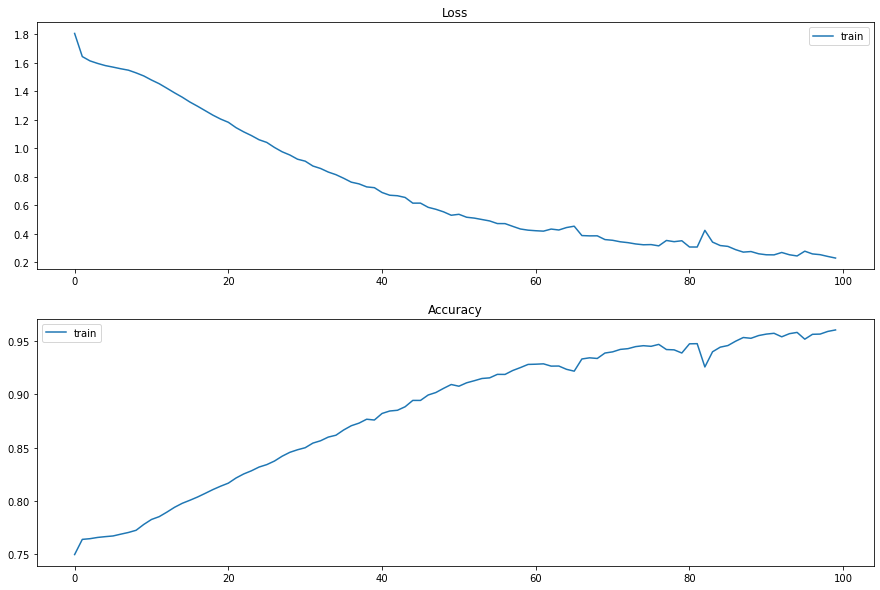

In [56]:
from matplotlib import pyplot
# plot loss during training
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()

In [57]:
from keras.models import load_model
#training_model.save('GRU_model.h5')
#training_model = load_model('GRU_model.h5')

In [58]:
training_model.layers

In [59]:
encoder_inputs = training_model.input[0]
encoder_outputs, encoder_states = training_model.layers[2].output
encoder_model = Model(encoder_inputs, encoder_states)

latent_dim = dimensionality
decoder_states_inputs = Input(shape=(latent_dim,))
decoder_gru = training_model.layers[3]
decoder_inputs = training_model.input[1]
decoder_outputs, decoder_states = decoder_gru(decoder_inputs, initial_state=decoder_states_inputs)
decoder_dense= training_model.layers[4]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs,decoder_states_inputs], [decoder_outputs,decoder_states])
 
def decode_response(test_input):
    #Getting the output states to pass into the decoder
    states_value = encoder_model.predict(test_input)
    #Generating empty target sequence of length 1
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    #Setting the first token of target sequence with the start token
    target_seq[0, 0, target_features_dict['<START>']] = 1.
    
    #A variable to store our response word by word
    decoded_sentence = ''
    
    stop_condition = False
    while not stop_condition:
      #Predicting output tokens with probabilities and states
      output_tokens, states_value = decoder_model.predict([target_seq,states_value])
      #Choosing the one with highest probability
      sampled_token_index = np.argmax(output_tokens[0, -1, :])
      sampled_token = reverse_target_features_dict[sampled_token_index]
      # print(sampled_token)
      decoded_sentence += " " + sampled_token
      #Stop if hit max length or found the stop token
      if (sampled_token == '<END>' or len(decoded_sentence) > max_decoder_seq_length):
        stop_condition = True
      #Update the target sequence
      target_seq = np.zeros((1, 1, num_decoder_tokens))
      target_seq[0, 0, sampled_token_index] = 1.
    
    return decoded_sentence

In [60]:
def cleantext(usertext):
  usertext = removePunctuation(usertext)  
  usertext = removeEmojis(usertext) 
  usertext = deletedigits(usertext)
  tokens= tokenize(usertext, conditions=is_arabicrange)
  tokens = deleteduplication(tokens)
  usertext = ' '.join(tokens)
  
  T=list()
  tokens = tokenize(usertext, conditions=is_arabicrange)
  if len(tokens)>1:
      for tag in tokens:
          try:
              tag = strip_tashkeel(tag)
              tag = strip_tatweel(tag)
              tag = removeduplication(tag)                    
              # tag =stemming(tag)

              tag =tag.replace(u'لإ', u'لا')
              tag =tag.replace(u'لأ', u'لا')
              tag =tag.replace(u'لآ', u'لا')
              tag =tag.replace(u'ى', u'ي')
              tag = normalize_hamza(tag)
              tag =tag.replace(u'ٱ', u'ء')
              if tag.endswith(u'ه'):
                  tag =tag.replace(u'ه', u'ة')
              tag = removeduplication(tag)
              T.append(tag)
          except:
              pass
      usertext =' '.join(T)
  return usertext

In [61]:
class ChatBot:

  exit_commands = ("شكرا", "باي", "الى اللقاء")
#Method to start the conversation
  def start_chat(self):
    user_response = input("مرحبا أنا دزشات بوت تفضل بطرح سؤالك\n")
    user_response = cleantext(user_response)
    self.chat(user_response)
#Method to handle the conversation
  def chat(self, reply):
    while not self.make_exit(reply):
      reply = input(self.generate_response(reply)+"\n")
    
  #Method to convert user input into a matrix
  def string_to_matrix(self, user_input):
    tokens = re.findall(r"[\w']+|[^\s\w]", user_input)
    user_input_matrix = np.zeros(
      (1, max_encoder_seq_length, num_encoder_tokens),
      dtype='float32')
    for timestep, token in enumerate(tokens):
      if token in input_features_dict:
        user_input_matrix[0, timestep, input_features_dict[token]] = 1.
    return user_input_matrix
  
  #Method that will create a response using seq2seq model we built
  def generate_response(self, user_input):
    input_matrix = self.string_to_matrix(user_input)
    chatbot_response = decode_response(input_matrix)
    #Remove <START> and <END> tokens from chatbot_response
    chatbot_response = chatbot_response.replace("<START>",'')
    chatbot_response = chatbot_response.replace("<END>",'')
    return chatbot_response
#Method to check for exit commands
  def make_exit(self, reply):
    for exit_command in self.exit_commands:
      if exit_command in reply:
        print("أوكي, شكرا لتواصلكم معنا")
        return True
    return False
  
# chatbot = ChatBot()
# chatbot.start_chat()

In [62]:
class ChatBot_Evaluation:

  exit_commands = ("شكرا", "باي", "الى اللقاء")
#Method to start the conversation
  def start_chat(self,PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,DataX,DataY,TrainorTestY):
    print("1: PC = Correct response produced \n"+"2: NC = Unexpected response \n"+ "3: NI = Absence of response \n"+ "4: PI = Incorrect response produced \n")
    user_response = DataX[0]
    print("السؤال الأول: "+ user_response)
    print(" الاجابة الصحيحة: "+ DataY[0])
    user_response = cleantext(user_response)
    PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,P,R,F1Score,Accuracy = self.chat(user_response,PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,DataX,DataY,TrainorTestY)
    return PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,P,R,F1Score,Accuracy
#Method to handle the conversation
  def chat(self, reply,PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,DataX,DataY,TrainorTestY):
    for i in range(1,len(DataX)+1):
      responsedzchatbot = self.generate_response(reply)
      responsedzchatbot = responsedzchatbot.lstrip().rstrip()
      print(" جواب ديزادشاتبوت: "+ responsedzchatbot+"\n")
      #print("أرجو تقييم الجواب حسب الأرقام ادناه:  \n")
      #print("len(responsedzchatbot)= ",len(responsedzchatbot))
      if len(responsedzchatbot)==0:
        NI = NI + 1
        print("NI")
      else:
        #print("responsedzchatbot in DataY= ",responsedzchatbot in DataY)  
        if responsedzchatbot in DataY:
          x = np.where(DataY == responsedzchatbot)
          #print("len(x)= ",len(x))
          if len(x)>0:
            findit=False
            for j in x:
              if DataX[j[0]] == reply:
                findit=True
                AvgLenW.append(len(responsedzchatbot.split(' ')))
                AvgLenC.append(len(responsedzchatbot))
                Cplt = Cplt + 1
                PC = PC + 1
                print("Cplt")
                print("PC")
                break
            if findit==False:
              PI = PI + 1
              print("PI")
        elif responsedzchatbot not in DataY:
          #print("responsedzchatbot not in DataY= ",responsedzchatbot not in DataY)
          findit=False
          for z,itemA in enumerate(DataY):
            if responsedzchatbot in itemA:
              #print("responsedzchatbot  in itemA= ",responsedzchatbot in itemA)
              if reply in DataX[z]:
                findit=True
                AvgLenW.append(len(responsedzchatbot.split(' ')))
                AvgLenC.append(len(responsedzchatbot))
                PC = PC + 1
                print("PC")
                break
          if findit==False:
            #print("responsedzchatbot in TrainorTestY= ",responsedzchatbot in TrainorTestY)  
            if responsedzchatbot not in TrainorTestY:
              NC = NC + 1
              print("NC")
            elif responsedzchatbot  in TrainorTestY:
              PI = PI + 1
              print("PI")


      
      # feedback =int(input("Your Feedback please:  \n"))
      # if feedback ==1 :
      #   PC = PC + 1
      #   AvgLenW.append(len(responsedzchatbot.split(' ')))
      #   AvgLenC.append(len(responsedzchatbot))
      #   completres =int(input("Is the response complet:1 or not:0:  \n"))
      #   if completres ==1 :
      #     Cplt = Cplt + 1
      # elif feedback ==2 :
      #   NC = NC + 1
      # elif feedback ==3 :
      #   NI = NI + 1
      # elif feedback ==4 :
      #   PI = PI + 1
      if i <len(DataX):
        print("السؤال التالي: "+ DataX[i])
        print(" الاجابة الصحيحة: "+ DataY[i])
        reply = DataX[i]
        reply = cleantext(reply)
    
    P= PC/(PC+NC)
    R = PC/(PC+PI)
    F1Score = (2*P*R)/(P+R)
    Accuracy = (PC+NI)/(PC+NC+PI+NI)
    return PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,P,R,F1Score,Accuracy

  #Method to convert user input into a matrix
  def string_to_matrix(self, user_input):
    tokens = re.findall(r"[\w']+|[^\s\w]", user_input)
    user_input_matrix = np.zeros(
      (1, max_encoder_seq_length, num_encoder_tokens),
      dtype='float32')
    for timestep, token in enumerate(tokens):
      if token in input_features_dict:
        user_input_matrix[0, timestep, input_features_dict[token]] = 1.
    return user_input_matrix
  
  #Method that will create a response using seq2seq model we built
  def generate_response(self, user_input):
    input_matrix = self.string_to_matrix(user_input)
    chatbot_response = decode_response(input_matrix)
    #Remove <START> and <END> tokens from chatbot_response
    chatbot_response = chatbot_response.replace("<START>",'')
    chatbot_response = chatbot_response.replace("<END>",'')
    return chatbot_response
#Method to check for exit commands
  def make_exit(self, reply):
    for exit_command in self.exit_commands:
      if exit_command in reply:
        print("أوكي, شكرا لتواصلكم معنا")
        return True
    return False

In [63]:
chatbot = ChatBot_Evaluation()
PC=0
NC=0
NI=0
PI=0
Cplt=0
AvgLenW=list()
AvgLenC=list()

PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,P,R,F1Score,Accuracy = chatbot.start_chat(PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,X_Test,Y_Test,Y_Train)
print("PC: ",PC)
print("NC: ",NC)
print("NI: ",NI)
print("PI: ",PI)
print("Cplt: ",Cplt)

avglenresW = sum(AvgLenW)/len(AvgLenW)
print("AvgLenW: ", round(avglenresW,2))
print("Min AvgLenW: ", min(AvgLenW))
print("Max AvgLenW: ", max(AvgLenW))

avglenresC= sum(AvgLenC)/len(AvgLenC)
print("AvgLenC: ", round(avglenresC,2))
print("Min AvgLenC: ", min(AvgLenC))
print("Max AvgLenC: ", max(AvgLenC))

print("Precision: ",round(P,2))
print("Recall: ",round(R,2))
print("F1-Score: ",round(F1Score,2))
print("Accuracy: ",round(Accuracy,2))

1: PC = Correct response produced 
2: NC = Unexpected response 
3: NI = Absence of response 
4: PI = Incorrect response produced 

السؤال الأول: ما هي جريمة الاساءة للدولة
 الاجابة الصحيحة: الخيانة للدولة من خلال التفاعل مع دولة ءخري
1/1 [==============================] - 0s 16ms/step
 جواب ديزادشاتبوت: جريمة الاساءة للزوج التعنيف التحريض الاهمال

PI
السؤال التالي: ما هي الجنحة المتعلقة بالتحرش الجنسي
 الاجابة الصحيحة: الجنحة المتعلقة بالتحرش الجنسي هي جنحة تتعلق بالتحرش بشخص ءاخر جنسيا
1/1 [==============================] - 0s 18ms/step
 جواب ديزادشاتبوت: الجنحة المتعلقة بالتزوير هي جنحة تتعلق بتزوير

NC
السؤال التالي: ما هي جريمة الاساءة للتهرب الضريبي
 الاجابة الصحيحة: الاساءة للتهرب الضريبي تشمل التموية والتلاعب والتزوير
1/1 [==============================] - 0s 16ms/step
 جواب ديزادشاتبوت: الاساءة للحياة الخاصة من خلال الاعتداء علي

NC
السؤال التالي: الاحكام المتعلقة بالتعويض عن الخسارة الناجمة عن الايجار المفتوح
 الاجابة الصحيحة: الاحكام المتعلقة بالتعويض عن الخسارة الناجمة عن ال

In [64]:
chatbot = ChatBot_Evaluation()
PC=0
NC=0
NI=0
PI=0
Cplt=0
AvgLenW=list()
AvgLenC=list()

PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,P,R,F1Score,Accuracy = chatbot.start_chat(PC,NC,NI,PI,Cplt,AvgLenW,AvgLenC,X_Train,Y_Train,Y_Test)
print("PC: ",PC)
print("NC: ",NC)
print("NI: ",NI)
print("PI: ",PI)
print("Cplt: ",Cplt)
avglenresW = sum(AvgLenW)/len(AvgLenW)
print("AvgLenW: ", round(avglenresW,2))
print("Min AvgLenW: ", min(AvgLenW))
print("Max AvgLenW: ", max(AvgLenW))

avglenresC= sum(AvgLenC)/len(AvgLenC)
print("AvgLenC: ", round(avglenresC,2))
print("Min AvgLenC: ", min(AvgLenC))
print("Max AvgLenC: ", max(AvgLenC))

print("Precision: ",round(P,2))
print("Recall: ",round(R,2))
print("F1-Score: ",round(F1Score,2))
print("Accuracy: ",round(Accuracy,2))

1: PC = Correct response produced 
2: NC = Unexpected response 
3: NI = Absence of response 
4: PI = Incorrect response produced 

السؤال الأول: ما هي ءءثار تصفية الميراث
 الاجابة الصحيحة: ءءثار تصفية الميراث توزيع الميراث علي الورثة ءنهاء الاجراءات القانونية
1/1 [==============================] - 0s 16ms/step
 جواب ديزادشاتبوت: ءءثار تصفية الميراث توزيع الميراث علي الورثة

PC
السؤال التالي: ما هو حضانة الاولاد
 الاجابة الصحيحة: حضانة الاولاد حق الوالدين للحصول علي وصاية الاولاد بعد الطلاق
1/1 [==============================] - 0s 16ms/step
 جواب ديزادشاتبوت: حضانة الاولاد حق الوالدين للحصول علي وصاية

PC
السؤال التالي: ما هي الجنحة المتعلقة بالتعدي علي الحيوانات
 الاجابة الصحيحة: التعدي علي الحيوانات الايذاء ءو الاهمال الجسيم للحيوانات الاليفة ءو البرية
1/1 [==============================] - 0s 16ms/step
 جواب ديزادشاتبوت: التعدي علي حرية المعتقد الاعتداء علي الدين

NC
السؤال التالي: حق الاقامة والاقامة المءقتة
 الاجابة الصحيحة: حق الاقامة والاقامة المءقتة بموجب القوانين المحلية
1/1 [